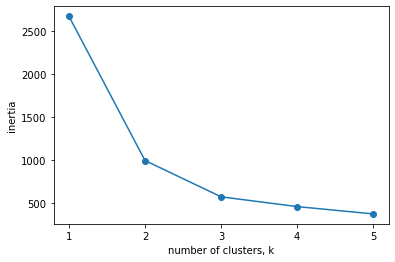

In [8]:
# Unsupervised Learning with KMeans Clustering

# Displaying Cross tab of model
# Demostrating how to load data, create a KMeans model, find the number of clusters to use, Transform data, evaluate model

# Importing libraries
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# loading dataset
seed_df = pd.read_csv('/Users/alexandergursky/Local_Repository/Datasets/Structured/CSV/Grains/seeds.csv', header=None)

# Creating a range of 5 clusters to use and an empty list of inertias to append to
ks = range(1, 6)
inertias = []

# Iterate through the range
for k in ks:
    # Create a KMeans instance with k clusters: model
    # Defining the number of clusters to use with k
    model = KMeans(n_clusters= k)
    
    # Fit model to samples
    model.fit(seed_df.iloc[:,0:6])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot nth clusters(ks) vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

# The inertia decreases very slowly from 3 clusters to 4, 
# so it looks like 3 clusters would be a good choice for this dataset.

In [9]:
# Hash-mapping keys to the required value
varieties_name = {
    1 : 'Kama wheat', 
    2 : 'Rosa wheat',
    3 : 'Canadian wheat' 
}
# Mapping to a new column
seed_df['varieties'] = seed_df[7].map(varieties_name)

# Changing column name
#fist input is the current name of the column to change, second is what you are changing it to
seed_df = seed_df.rename(columns={7 : 'lables'})


In [10]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters= 3)

# Use fit_predict to fit model and obtain cluster labels: cluster_labels
cluster_lables = model.fit_predict(seed_df.iloc[:,0:6])

# Create crosstab: ct
ct = pd.crosstab(cluster_lables, seed_df['varieties'])
# Display ct
print(ct)

# The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters.
# row_0 = n_cluster

# Terminal Output
# varieties  Canadian wheat  Kama wheat  Rosa wheat
# row_0                                            
# 0                       0           1          60
# 1                      68           9           0
# 2                       2          60          10

varieties  Canadian wheat  Kama wheat  Rosa wheat
row_0                                            
0                      68           9           0
1                       0           1          60
2                       2          60          10
